In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats.mstats import pearsonr as corr
from math import pi
from functools import reduce
from operator import mul
from math import log

In [2]:
np.random.seed(42)
dist = [np.random.normal(0, 5, 10000), np.random.normal(0, 2, 10000)]
general = dist[0]

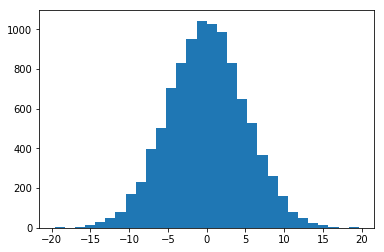

In [3]:
plot = plt.hist(general, bins=30)

In [4]:
def f_norm(mean, std):
    return lambda x: np.exp(-(x - mean)**2 / (2 * std ** 2)) / (std * (2 * pi) ** 0.5)


def llf(sample, f0, f1):
    return np.log(f1(sample) / f0(sample))


def sprt(general, f0, f1, alpha, beta, num_iterations=10000):
    c0 = np.log(beta / (1 - alpha))
    c1 = np.log((1 - beta) / alpha)
    results = []
    for i in range(num_iterations):
        sample = np.array([])
        while True:
            sample = np.hstack([sample, np.random.choice(general, 1)])
            Z = llf(sample, f0, f1).sum()
            if Z < c0:
                results.append((0, len(sample)))
                break
            elif Z > c1:
                results.append((1, len(sample)))
                break
    return results


def w(x, y):
    return (1 - x) * np.log((1 - x) / y) + x * np.log(x / (1 - y))


def E(f, mean0, mean1, std):
    func = lambda x: f(x) * (-(x - mean1) ** 2 + (x - mean0) ** 2) / (2 * std ** 2)
    return integrate.quad(func, -np.inf, np.inf)[0]


def estimation(alpha, beta, mean0, mean1, std, f0, f1):
    return -w(alpha, beta) / E(f0, mean0, mean1, std), w(beta, alpha) / E(f1, mean0, mean1, std)

In [5]:
mean0 = 0
mean1 = 0.1

f0 = f_norm(mean0, 5)
f1 = f_norm(mean1, 5)
alpha = 0.05
beta = 0.1

In [14]:
%%time

result = pd.DataFrame(sprt(general, f0, f1, alpha, beta, num_iterations=500), columns=['result', 'len_sample'])

Wall time: 57min 35s


Results of the tests, 0 stands for the 0 hypothesis (correct one), and 1 stands for 1 hypotesis (incorrect):

In [15]:
result.result.value_counts()

0    487
1     13
Name: result, dtype: int64

Average number of observations for both results:

In [16]:
result[result.result == 1].len_sample.mean(), result[result.result == 0].len_sample.mean()

(6416.538461538462, 9417.854209445586)

In [ ]:
Expected number of obser

In [17]:
estimation(alpha, beta, mean0, mean1, 5, f0, f1)

(9971.043101562955, 11881.027011229726)

As we can see, the results of the SPRT runs in most cases (487 out of 500) return the correct result. Also the 